In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import networkx as nx

In [10]:
customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

In [12]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [76]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [32]:
products['Category'].value_counts()

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

In [ ]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


### Task 1

#### Seeing the category wise product quantities in all the regions

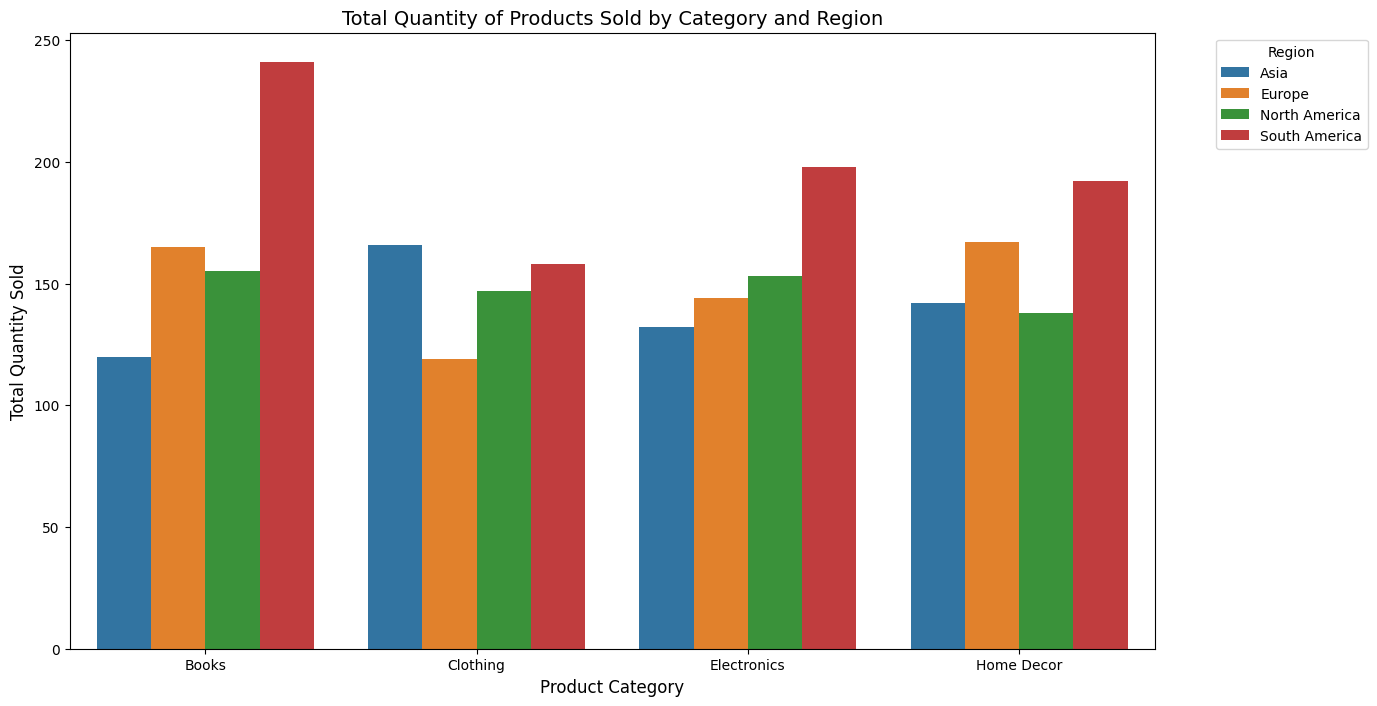

In [44]:
overall_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

category_region_quantity = overall_data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=category_region_quantity, x='Category', y='Quantity', hue='Region')
plt.title('Total Quantity of Products Sold by Category and Region', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Calculating and visualize region-wise total revenue and the split of total revenue by product category for each region

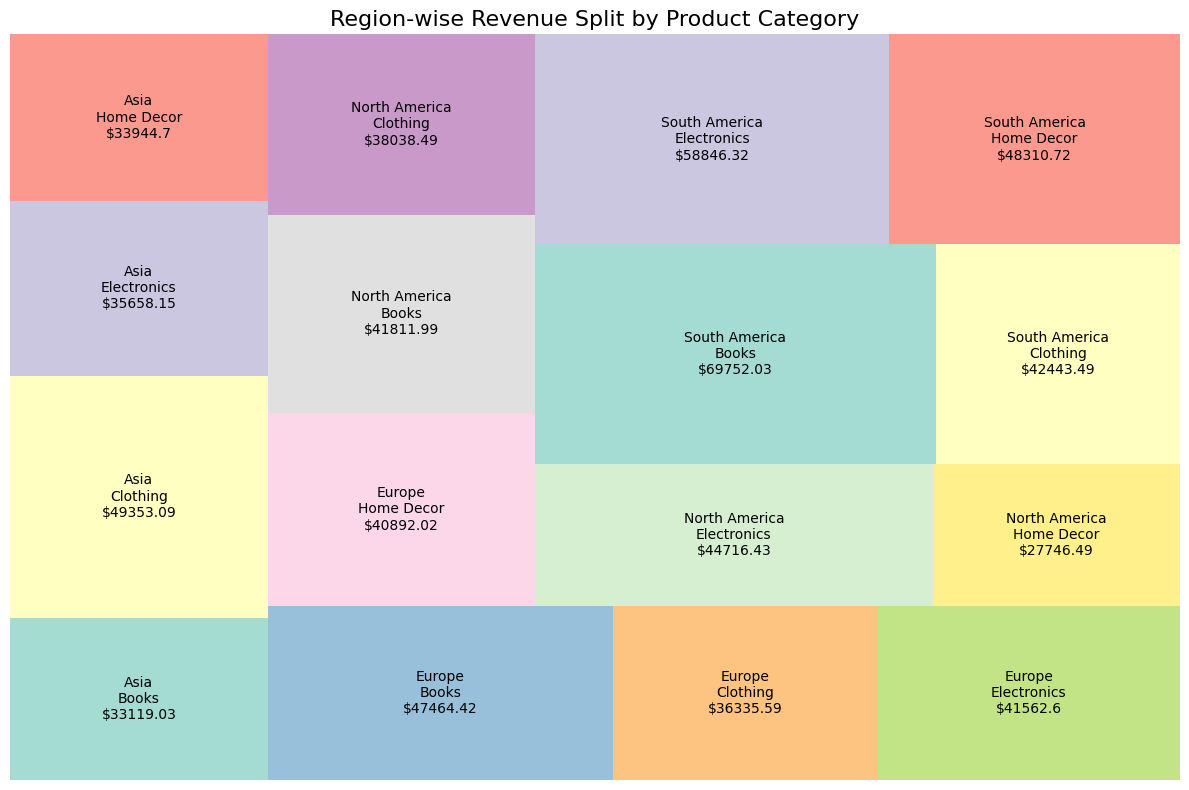

In [59]:
category_region_quantity['Label'] = (
    category_region_quantity['Region'] + "\n" +
    category_region_quantity['Category'] + "\n" +
    "$" + category_region_quantity['TotalValue'].round(2).astype(str)
)

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=category_region_quantity['TotalValue'],
    label=category_region_quantity['Label'],
    color=sns.color_palette('Set3', len(category_region_quantity)),
    alpha=0.8,
)
plt.title('Region-wise Revenue Split by Product Category', fontsize=16)
plt.axis('off')  
plt.tight_layout()
plt.show()

#### Seeing the trend that how many transactions are happening daywise and then subdividing them into regions.

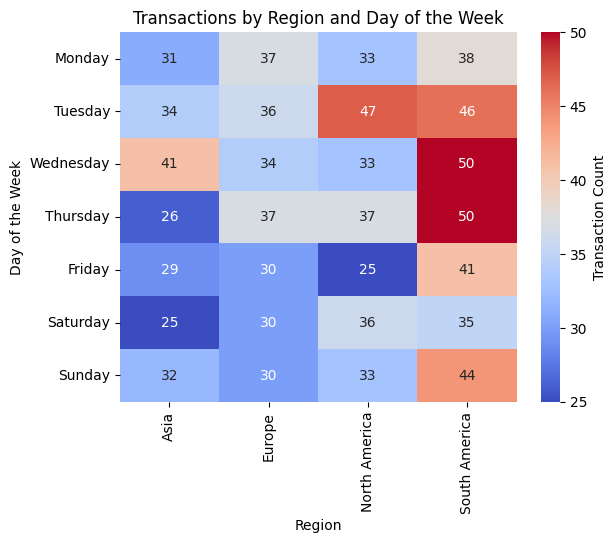

In [71]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()
region_day_transactions = (
    transactions.groupby(['Region', 'DayOfWeek'])
    .size()
    .reset_index(name='TransactionCount')
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
region_day_transactions['DayOfWeek'] = pd.Categorical(region_day_transactions['DayOfWeek'], categories=day_order, ordered=True)

region_day_pivot = region_day_transactions.pivot(index='DayOfWeek', columns='Region', values='TransactionCount')

sns.heatmap(
    region_day_pivot, 
    annot=True, 
    cmap='coolwarm', 
    cbar_kws={'label': 'Transaction Count'}
)
plt.title('Transactions by Region and Day of the Week')
plt.xlabel('Region')
plt.ylabel('Day of the Week')
plt.show()


#### Customer Retention

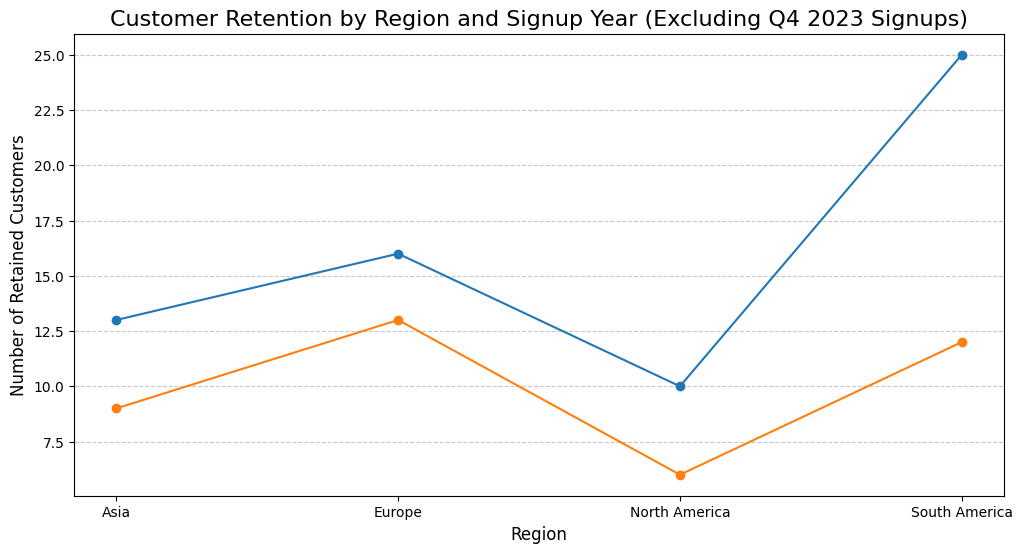

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year

customers_2022_2023 = customers[customers['SignupYear'].isin([2022, 2023])]

customers_exclude_q4_2023 = customers_2022_2023[
    ~(
        (customers_2022_2023['SignupYear'] == 2023) &
        (customers_2022_2023['SignupMonth'] >= 10)
    )
]

retained_customers = customers_exclude_q4_2023.merge(
    transactions[transactions['TransactionYear'] == 2024], 
    on='CustomerID', 
    how='inner'
)

retention_by_region = retained_customers.groupby(['SignupYear', 'Region'])['CustomerID'].nunique().reset_index()
retention_by_region.columns = ['SignupYear', 'Region', 'RetainedCustomerCount']

retention_pivot = retention_by_region.pivot(index='Region', columns='SignupYear', values='RetainedCustomerCount')

plt.figure(figsize=(12, 6))
for year in retention_pivot.columns:
    plt.plot(retention_pivot.index, retention_pivot[year], marker='o', label=f"Signup Year {year}")

plt.title('Customer Retention by Region and Signup Year (Excluding Q4 2023 Signups)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Retained Customers', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Top products category wise

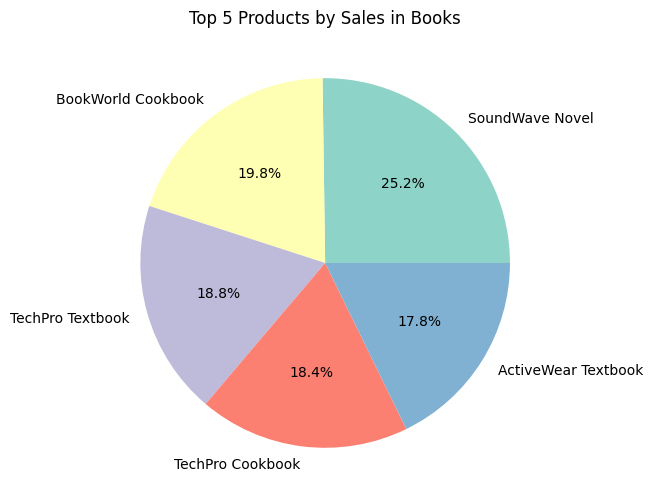

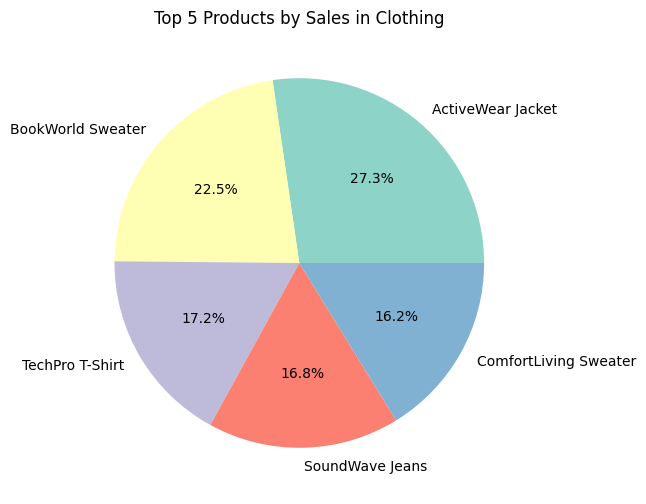

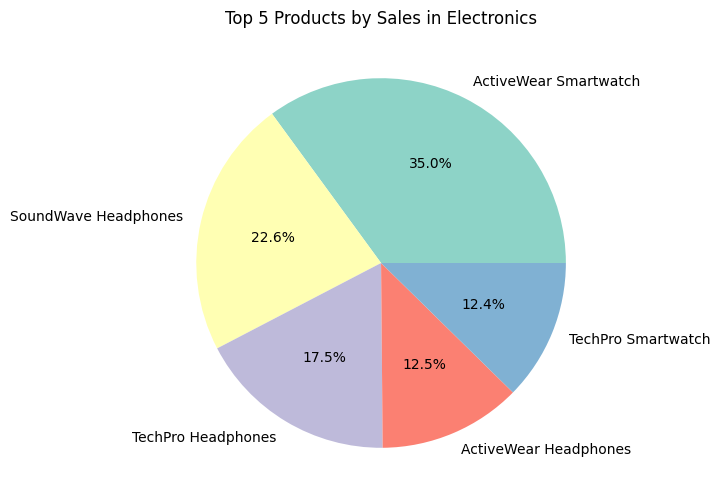

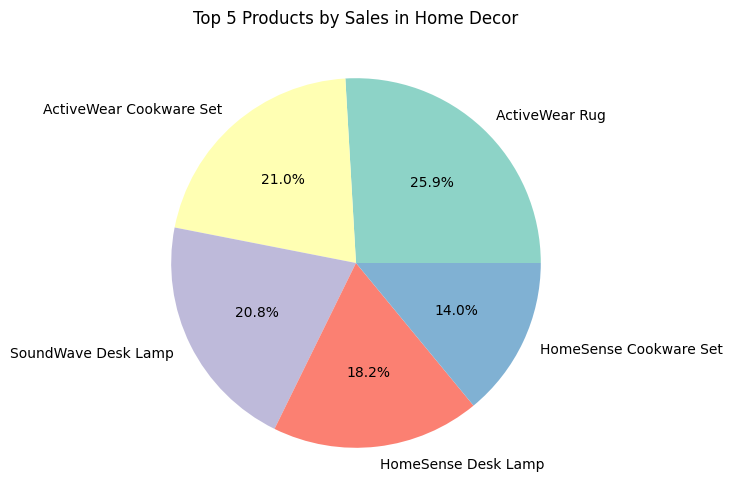

In [93]:
transactions_products = transactions.merge(products, on='ProductID', how='left')

product_sales = transactions_products.groupby(['Category', 'ProductName'], as_index=False).agg(
    TotalSales=('TotalValue', 'sum')
)

product_sales['Rank'] = product_sales.groupby('Category')['TotalSales'].rank(method='first', ascending=False)

top_5_products = product_sales[product_sales['Rank'] <= 5].sort_values(['Category', 'Rank'])

categories = top_5_products['Category'].unique()

for category in categories:
    category_data = top_5_products[top_5_products['Category'] == category]
    plt.figure(figsize=(6, 6))
    plt.pie(
        category_data['TotalSales'],
        labels=category_data['ProductName'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Set3', len(category_data))
    )
    plt.title(f'Top 5 Products by Sales in {category}')
    plt.show()

